<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Black Jack  Reinforcement Learning and Monte Carlo Methods**


Estimated time needed: **60** minutes


In this project, we will try to find the best playing strategy for Black Jack by using reinforcement learning. You will explore the basics of Reinforcement Learning and Monte Carlo Methods. You will learn about training your own agent to succeed in simple and complex games.  Discover better ways to train your agent and analyze its performance.


## Objectives

After completing this lab you will be able to:

*   Work with an OpenAI Gym environments
*   Explain what Reinforcement Learning is
*   Explain what Monte Carlo Method is
*   Create an agent that uses Monte Carlo Method to play Black Jack
*   Train and Test the agents using the Black Jack environment


----


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#What's-Reinforcement-Learning?">What's Reinforcement Learning?</a>
        <ol>
            <li><a href="#Basic-Terminology">Basic Terminology</a></li>
            <li><a href="#Reinforcement-Learning-Process">Reinforcement Learning Process</a></li>
        </ol>
    </li>
    <li><a href="#BlackJack-Environment">Blackjack Environment</a></li>
    <li><a href="#Epsilon-Greedy-Policy">Epsilon-Greedy Policy</a></li>
    <li><a href="#Monte-Carlo-Method">Monte Carlo Method</a></li>
    <li><a href="#Exercises">Exercises</a>
</ol>


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 math copy
# Note: If your environment doesn't support "!mamba install", use "!pip install"

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
!pip install gym==0.22.0 pygame

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 4.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708364 sha256=b6a5197c8ff6f548bcdb2abdfb94c55411e75fbd9664ea8d35f864443e506e7b
  Stored in directory: /Users/luish/Library/Caches/pip/wheels/a5/c1/2e/c8e267f24a2af76af3dc340dc0c50bfb7358631a07e2e0aab0
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.26.2
    Uninstalling gym-0.26.2:
      Successfully uninstalled gym-0.26.2


Now let's download the file with functions that will be useful.


In [1]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/blackjackutility.py

--2023-10-17 15:14:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/blackjackutility.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2525 (2,5K) [application/x-python]
Saving to: ‘blackjackutility.py’

blackjackutility.py 100%[===================>]   2,47K  --.-KB/s    in 0s      

2023-10-17 15:14:56 (602 MB/s) - ‘blackjackutility.py’ saved [2525/2525]



Please, it's necessary to **RESTART THE KERNEL**. 


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [20]:
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
# from blackjackutility import get_total, game_result

### Defining Helper Functions

We will define some functions to help us train the algorithm and visualize the game results. 
This function is used to plot the value function:


In [2]:
def plot_value_function(V):
    """
    plot the estimated value function for blackjack 
    Returns:  void plots value function 
    Args:
    V: a dictionary of estimated values for blackjack 
    """
    #range of player score  
    player = [state[0] for state in V.keys()]
    max_player = max(player)
    min_player = min(player)
    player_range = np.arange(min_player, 22, 1)
    #range of dealer score      
    dealer = [state[1] for state in V.keys()]
    max_dealer = max(dealer)
    min_dealer = min(dealer)
    dealer_range = np.arange(min_dealer, 11, 1)
    #empty array for the value function, first access in the players score second  is the dealer, third is if  there  is an ace    
    V_plot = np.zeros((21 - min_player + 1, max_dealer - min_dealer + 1, 2))
    #create a mesh grid for plotting 
    X, Y = np.meshgrid(dealer_range, player_range)

    #populate an array  of values for different  scores not including losing scores 
    for (player,dealer,ace), v in V.items():
        if player <= 21 and dealer <= 21:
            V_plot[player - min_player, dealer - min_dealer, (1 * ace)] = V[(player, dealer, ace)]

    #plot surface        
    fig, ax = plt.subplots(nrows = 1, ncols = 2, subplot_kw = {'projection': '3d'})
    ax[0].plot_wireframe(X, Y, V_plot[:,:,0])
    ax[0].set_title('no ace')
    ax[0].set_xlabel('dealer')
    ax[0].set_ylabel('player ')
    ax[0].set_zlabel('value function')
    ax[1].plot_wireframe(X, Y, V_plot[:,:,1])
    ax[1].set_title('no ace')
    ax[1].set_xlabel('dealer')
    ax[1].set_ylabel('player ')
    ax[1].set_zlabel('value function')
    ax[1].set_title(' ace')
    fig.tight_layout()
    plt.show()

    #plot top view of the surface     
    fig, ax = plt.subplots(nrows = 1, ncols = 2)   
    ax[0].imshow((V_plot[:, :, 0]), extent =[1, 10, 21, 4])
    ax[0].set_title('no ace')
    ax[0].set_xlabel('dealer')
    ax[0].set_ylabel('player ')   
    im=ax[1].imshow(V_plot[:, :, 1],extent =[1, 10, 21, 4])
    ax[1].set_title('ace')
    ax[1].set_xlabel('dealer')
    fig.colorbar(im, ax = ax[1])

This function will plot blackjack policy:


In [3]:
def plot_policy_blackjack(policy):
    """
    plot the policy for blackjack 
    Returns:  void plots policy function 
    Args:
    policy: a dictionary of estimated values for blackjack 
    """    
    #range of player score 
    player = [state[0] for state in  policy.keys()]
    max_player = max(player)
    min_player = min(player)
    #this vale is use in RL book 
    #min_player=12
    player_range = np.arange(min_player, 22, 1)
    #range of dealer score      
    dealer = [state[1] for state in policy.keys()]
    max_dealer = max(dealer)
    min_dealer = min(dealer)
    dealer_range = np.arange(min_dealer, 11, 1)
    #empty array for the value function, first access in the players score second  is the dealer, third is if  there  is an ace    
    policy_plot = np.zeros((21 - min_player + 1, max_dealer - min_dealer + 1, 2))
    #create a mesh grid for plotting 
    X, Y = np.meshgrid(dealer_range, player_range)
    
    
    #populate an array  of values for different  policy not including losing states above 21 
    for (player, dealer, ace), v in policy.items():
        if player <= 21 and dealer <= 10 and player >= min_player:
            policy_plot[player - min_player, dealer - min_dealer, (1 * ace)] = policy[(player, dealer, ace)]

    
    fig, ax = plt.subplots(nrows = 1, ncols = 2)   
    ax[0].imshow((policy_plot[:, :, 0]),cmap = plt.get_cmap('GnBu', 2),extent = [1,10,21,4])
    ax[0].set_title('no ace')
    ax[0].set_xlabel('dealer')
    ax[0].set_ylabel('player ') 
    

    ax[1].set_title('ace')
    ax[1].set_xlabel('dealer')
    im=ax[1].imshow(policy_plot[:, :, 1],extent = [1, 10, 21, 4], cmap = plt.get_cmap('GnBu', 2))
    fig.colorbar(im, ax = ax[1], ticks=[0, 1])

This function calculates the average number of wins for a game of blackjack given a policy:


In [4]:
def average_wins(environment, policy = None, episodes = 10):
    """
    This function calculates the average number of wins for a game of blackjack given a policy.
    If no policy is provided a random policy is selected.
    Returns: average_wins: the average number of wins 
    std_wins: the average number of wins 
    Args:
    environment:AI gym balckjack envorment object 
    policy:policy for blackjack if none a random  action will be selected 
    episodes: number of episodes 
    """

    win_loss = np.zeros(episodes)

    for episode in range(episodes):
        state = environment.reset()
        done = False

        while not done:
            if policy and isinstance(policy[state],np.int64):
                 
                action = policy[state]
                
            else:
                action = environment.action_space.sample()

            state, reward, done, info = environment.step(action)
        result = game_result(environment, state, show = False)
        if reward == 1:
            win_loss[episode] = 1
        else:
            win_loss[episode] = 0  

        
    average_wins = win_loss.mean()
    std_win = win_loss.std() / np.sqrt(episodes)

    return average_wins, std_win


def games_with_policy(environment, policy = None, episodes = 10):
    sum_ = 0

    for episode in range(episodes):
        state = environment.reset()
        done = False
        print("_________________________________________")
        print("Episode {}".format(episode))
    

        print("State: {}".format(state))
        print("The Agent's current sum: {}, The Dealer's one showing card: {}, Agent's usable ace: {}".format(state[0],state[1],state[2]))
        print("The Agent has the following cards: {}".format(environment.player))
        print('The Dealer has the following cards: {}'.format(environment.dealer))
        while not done:
        
            if policy and isinstance(policy[state], np.int64):
                    
                action = policy[state]
                    
            else:
                action = environment.action_space.sample()
        
            if action:
                print("Hit")
                
            else:
                print("Stand")

            state, reward, done, info = environment.step(action)

            print("State: {}".format(state))
            print("The Agent's current sum: {}, The Dealer's one showing card: {}, Agent's usable ace: {}".format(state[0],state[1],state[2]))
            print("The Agent has the following cards: {}".format(environment.player))
            print('The Dealer has the following cards: {}'.format(environment.dealer))

        print("Done: {}".format(done))
        result = game_result(environment, state)
        sum_ += reward
    print('Total reward: {}'.format(sum_))

In [5]:
def get_total(Input):
    """
    This function will calculate the maximum total of a hand in 21. 
    It will also take into consideration if the Deck has aces.  

    Returns: 
    Maxmum value of a deck of card 
    Args:
    Input:List of numbers representing  a hand 

    """
    Input = np.array(Input)
    #maximum player hand under or equal to 21 
    Max = 0
    #check if the hand has an ace
    if 1 in set(Input):
        #put all aces in one array 
        aces = Input[Input == 1]
        #all  other cards  in a second array 
        not_aces = Input[Input != 1]
        #try different posable combinations of aces as 1 or 11 
        for ace in range(len(aces) + 1):
            #convert each  ace to an 11 
            aces[0:ace] = 11
            #find the total of a particular combination 
            total = aces.sum() + not_aces.sum()
            # check if the total is 21 
            if total == 21:
                Max = 21
                break
            #check if the total is larger than Max value but less than 22 

            elif total > Max and total < 22:
                #if so total is new max
                Max = total

    else:
        #determine  sum if no aces in the deck 
        Max = sum(Input)

    return Max  

def game_result(environment, state, show = True):
    '''
    this function  will determine the results of  a game  of Black Jack after an episode only  tested for open AI  gym 
    Returns: 
    result:   used to debug result of a game like open AI  gym +1,drawing is 0, and losing is -1, None for error 
    Args:
    environment: open ai gym black jack environment
    state: state of open ai gym black jack environment
    '''
    if show:
        print("Final state: {}".format(state))
        print("The Agent's final sum: {}, The Dealer's one showing card: {}, Agent's usable ace: {}".format(state[0], state[1], state[2]))
        print("The Agent's final cards: {}".format(environment.player))

    dealer_sum = get_total(environment.dealer)
    result = None
    if show:
        print("The Dealer cards: {} The Dealer's score: {} The Agent's score: {} ".format(environment.dealer, dealer_sum, state[0]))
    if state[0] > 21:
        if show:
            print("Bust")
        result = -1
        
    elif dealer_sum > 21:
        if show:
            print("Agent Wins")
        result = 1  
        
    elif state[0] > dealer_sum and state[0] < 22:
        if show:
            print("Agent Wins")
        result = 1
        
    elif  state[0] < dealer_sum and dealer_sum < 22 : 
        if show:
            print("Agent Loses")
        result = -1

    elif state[0] == dealer_sum:
        if show:
            print('Draw')
        return 0
    
    return result 

## Reinforcement Learning Explained 
In general **Reinforcement Learning**  is just another machine learning method, which is based on rewarding desired actions/output and punishing for the undesired ones. Reinforcement learning models, just like people, are choosing which action to make based on the expected return of each action. You must give your model some input which include the information about current situation and possible actions, then you must reward it based on the output. Reinforcement learning models learn to perform a task through repeated trial and error interactions with a changing environment, without any human intervention.
 
### Basic Terminology 

* **Agent**: is your reinforcement learning model, it's a decision maker and learner, 

* **Environment**: is a world around your agent, the agent learns and acts inside of it. The environment takes the action provided by the agent and returns the next
**state** and the **reward**.

* **State**: is a complete description of the state of the environment. 

* **Action**: is the way agent interacts with the environment, the moves that your agent can make. **Aciton Space** is the set of all possible actions. 

* **Reward**: is the feedback from the environment, it can be negative or positive and impacts the agent and serves as an indication to an agent of what you want it to achieve. Rewards are generally unknown and agents learn how to correctly estimate the reward.

* **Policy**: is a rule used by an agent to decide what actions to take, given the specific state. It works as a map from state to some action or a set of probabilities for each action in the action space. 


* **Value Function**: is the function that returns the expected total reward your agent can get from following the specific policy. The agent uses this value function to make decisions and learns by updating the expected reward values of the parameters of this function. In this lab we will be using the  state-action value function, so our function $Q(s,a)$ will use a state-action pair and will return an estimated reward for taking action $a$ from state $s$. 

### Reinforcement Learning Process
1. Agent plays a number of games
2. In every game, the agent chooses an **Action** form the action space by using **Policy** and **Value Function**
3. **Action** impacts the environment and the **Reward** and the new **State** is returned to the agent.
4. The agent keeps track of what reward it received after choosing a certain action from a certain set. 
5. The after completing the game, the agent updates the estimated reward for each state and action by using the actual rewards values received while playing the game. 
6. The whole process repeats again.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0O9IEN/reinforcement-learning-fig1-700.jpg" width="30%" alt="cheques image">


Famous RL models that play Chess, Go or Atari Games on superhuman levels, are all based on the aforementioned principles and concepts. 

At first, these definitions may look confusing but don't be scared, we will review and practice them more through out the lab 

<p style='color: blue'>Now that you know the basics, lets find what the aforementioned things are in the Blackjack environment.</p>


## BlackJack Environment 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/blackjack.gif" width="30%" alt="iris image">

**Blackjack** is a card game played against a dealer. At the start of a round, both player and dealer are dealt 2 cards. The player can only see one of the dealer’s cards. The goal of the game is to get the value of your cards as close to 21 as possible, without crossing 21. The value of each card is listed below.

* 10/Jack/Queen/King → 10
* 2 through 9 → Same value as card
* Ace → 1 or 11 (Player’s choice). Note that ace is called useful when It can be counted as 11 without going bust.

If the player has less than 21, they can choose to “hit” and receive a random card from the deck. They can also choose to “stand” and keep the cards they have. If the player exceeds 21, they go “bust” and automatically lose the round. If the player has exactly 21, they automatically win. Otherwise, the player wins if they are closer to 21 than the dealer.


Let's initialize our environment and explore it a bit.


A few notes on **Open Ai Gym**: Open Ai Gym is a toolkit for developing and comparing reinforcement learning algorithms. This is the gym open-source library, which gives you access to a standardized set of environments. It's quite useful in our case, since we are with a pretty standard environment. It also allows you to create your own custom environment but for now we will only explore a pre-define Blackjack environment. 


We create an openAI gym blackjack enviroment by calling gym method, we will use the `make` function to do so.


In [6]:
environment = gym.make('Blackjack-v1')

Now let's see what the **observation space** for our environment is. Observation space is a set of all possible states. We can view the space using the method `observation_space` :


In [7]:
environment.observation_space

Tuple(Discrete(32), Discrete(11), Discrete(2))

The observation of is a 3-tuple of: the player's (you) current sum, the dealer's one showing card (1-10 where 1 is ace), and whether or not the player holds a usable ace (0 or 1) or (`True` or `False`).

    Tuple(the players current sum, dealer's one showing card player holds, usable ace (0 or 1) )
Then we can explain `Tuple(Discrete(32), Discrete(11), Discrete(2))` as
* The highest score you can achieve is (11,10,11), and the lowest is (1), so there are 32 states for the player's score.
* The dealer only shows one card, which can be anything from 1 to 11
* The 'usable ace' space is True/False, so the size of the space is 2.

So there are $32 \times 11 \times 2 = 704$ possible states. Note that we have to reset the environment to start working with it. This function resets the game environment to what it was when you started the game. It will return the initial state $S_0$:


In [8]:
state=environment.reset()
print("s_{}={}".format(0, environment.observation_space.sample())) 

s_0=(20, 1, 1)


Let's see more possible states:


In [9]:
for i in range(15):
    print("s_{}={}".format(i, environment.observation_space.sample()))

s_0=(21, 3, 0)
s_1=(31, 7, 0)
s_2=(8, 3, 1)
s_3=(14, 9, 1)
s_4=(29, 1, 0)
s_5=(31, 2, 0)
s_6=(15, 9, 0)
s_7=(5, 1, 0)
s_8=(14, 5, 1)
s_9=(13, 9, 1)
s_10=(18, 6, 1)
s_11=(2, 8, 1)
s_12=(0, 8, 1)
s_13=(19, 1, 0)
s_14=(16, 4, 0)


In [10]:
for t in range(10):
    action=environment.action_space.sample()
    if action:
        print("Hit, A_{}={}".format(t,action))
    else:
        print("Stay",action)

Stay 0
Stay 0
Stay 0
Hit, A_3=1
Hit, A_4=1
Hit, A_5=1
Stay 0
Stay 0
Hit, A_8=1
Hit, A_9=1


Let's also check the player and dealers cards by using `environment.player` and `environment.dealer` function 


In [11]:
print(environment.observation_space.sample())
print(environment.player)
print(environment.dealer)

(23, 0, 1)
[10, 2]
[9, 10]


We will introduce a bit more terminology, **Episode** is a set of  agent-environment interactions from initial to final state, i.e it's one game that agent the plays. In addition, our agents are operating in a discrete-time game. Each time-advancing decision is a **step** (e.x. taking some action from some state). It's easy to see that each Episode consists of a series of steps. 

Let's play through some episodes of the game, choosing random actions for each step: 


In [8]:
episodes = 2
sum_ = 0
result = 0
error = 0

#setting the seed for reproduceability

for episode in range(episodes):
    state = environment.reset()
    done = False
    print("_________________________________________")
    print("Episode {}".format(episode))
   

    print("State: {}".format(state))
    print("The Agent's current sum: {}, The Dealer's one showing card: {}, Agent's usable ace: {}".format(state[0],state[1],state[2]))
    print("The Agent has the following cards: {}".format(environment.player))
    print('The Dealer has the following cards: {}'.format(environment.dealer))
    while not done:
    
        action = environment.action_space.sample()
       
        if action:
            print("Hit")
            
        else:
            print("Stand")

        state, reward, done, info = environment.step(action)

        print("State: {}".format(state))
        print("The Agent's current sum: {}, The Dealer's one showing card: {}, Agent's usable ace: {}".format(state[0],state[1],state[2]))
        print("The Agent has the following cards: {}".format(environment.player))
        print('The Dealer has the following cards: {}'.format(environment.dealer))

    print("Done: {}".format(done))
    result = game_result(environment,state)
    sum_ += reward
sum_

_________________________________________
Episode 0
State: (15, 10, True)
The Agent's current sum: 15, The Dealer's one showing card: 10, Agent's usable ace: True
The Agent has the following cards: [1, 4]
The Dealer has the following cards: [10, 4]
Hit
State: (15, 10, False)
The Agent's current sum: 15, The Dealer's one showing card: 10, Agent's usable ace: False
The Agent has the following cards: [1, 4, 10]
The Dealer has the following cards: [10, 4]
Hit
State: (25, 10, False)
The Agent's current sum: 25, The Dealer's one showing card: 10, Agent's usable ace: False
The Agent has the following cards: [1, 4, 10, 10]
The Dealer has the following cards: [10, 4]
Done: True
Final state: (25, 10, False)
The Agent's final sum: 25, The Dealer's one showing card: 10, Agent's usable ace: False
The Agent's final cards: [1, 4, 10, 10]
The Dealer cards: [10, 4] The Dealer's score: 14 The Agent's score: 25 
Bust
_________________________________________
Episode 1
State: (15, 4, False)
The Agent's cu

0.0

Run the code above a few more times and observe that our games are not really lucky. Try playing yourself, may be you can do better than a random action generator:


In [9]:
episodes = 10
sum_ = 0
result = 0
error = 0

#setting the seed for reproduceability

for episode in range(episodes):
    state = environment.reset()
    done = False
    print("_________________________________________")
    print("Episode {}".format(episode))
   

    print("State: {}".format(state))
    print("The Agent's current sum: {}, The Dealer's one showing card: {}, Agent's usable ace: {}".format(state[0],state[1],state[2]))
    print("The Agent has the following cards: {}".format(environment.player))
    print('The Dealer has the following cards: {}'.format(environment.dealer))
    while not done:
    
        action = environment.action_space.sample()
       
        if action:
            print("Hit")
            
        else:
            print("Stand")

        state, reward, done, info = environment.step(action)

        print("State: {}".format(state))
        print("The Agent's current sum: {}, The Dealer's one showing card: {}, Agent's usable ace: {}".format(state[0],state[1],state[2]))
        print("The Agent has the following cards: {}".format(environment.player))
        print('The Dealer has the following cards: {}'.format(environment.dealer))

    print("Done: {}".format(done))
    result = game_result(environment,state)
    sum_ += reward
sum_

_________________________________________
Episode 0
State: (12, 9, False)
The Agent's current sum: 12, The Dealer's one showing card: 9, Agent's usable ace: False
The Agent has the following cards: [9, 3]
The Dealer has the following cards: [9, 4]
Stand
State: (12, 9, False)
The Agent's current sum: 12, The Dealer's one showing card: 9, Agent's usable ace: False
The Agent has the following cards: [9, 3]
The Dealer has the following cards: [9, 4, 4]
Done: True
Final state: (12, 9, False)
The Agent's final sum: 12, The Dealer's one showing card: 9, Agent's usable ace: False
The Agent's final cards: [9, 3]
The Dealer cards: [9, 4, 4] The Dealer's score: 17 The Agent's score: 12 
Agent Loses
_________________________________________
Episode 1
State: (13, 10, True)
The Agent's current sum: 13, The Dealer's one showing card: 10, Agent's usable ace: True
The Agent has the following cards: [2, 1]
The Dealer has the following cards: [10, 6]
Hit
State: (19, 10, True)
The Agent's current sum: 19,

-1.0

Well, I assume, as long as you are not a professional gambler, your results were not much better than random model results. What will help us to win at this Casino Game, is ironically a casino name method: **Monte Carlo Method**. But before jumping there, lets define some things that will build an infrastructure for our learning process and elaborate/ implement previously defined terminology. 


At first we will start by exploring what greedy policy is and does:


### Epsilon-Greedy Policy

If you remember, as was mentioned before, policy is just a function that defines which action our agent should take based on the current state. In our environment, a simple deterministic policy $\pi$ for the the state $(15,10,0)$ may look like: 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/Screenshot%202022-11-23%20at%2010.36.45%20AM.png" width="50%" alt="iris image">

Now let's clarify a few things with the title. **Epsilon**, is just some constant, ($0 \leq \epsilon \leq 1$), and it will define some probability. **Greedy**, is a concept in computer science where a greedy algorithm is the one that makes the locally optimal choice at each stage. In our case, greedy policy implies that it will choose an action with the biggest estimated return. 

For now assume that $Q(s,a)$ is our value function, it will return an **estimated** reward based on the given state and action and let $A$ be the action space. Then our policy can be simply defined: 


$$
\pi(s) =
\begin{cases}
a = max_{a^* \in A}Q(s,a^*)) & \text{with probability 1-}  \epsilon \\\\\\
\text{some }a \in A & \text{with probability } \epsilon \\\\
\end{cases}
$$


You may ask why wouldn't we always use the best action, the action with the best estimated reward, what's the point of this epsilon constant. For it we will have to learn about 2 more concepts: 
 
* **Exploration** happens when the agent takes the random action to explore more opportunities, gather more information about possible actions and the environment.
* **Exploitation** happens when the agent makes the best decision given current information, it uses the best estimated action to maximize the reward. 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/Screenshot%202022-11-23%20at%2010.51.11%20AM.png" width="50%" alt="iris image">

As demonstrated in the diagram above, **Epsilon** defines the trade-off between Exploration and Exploitation.  We need it because the best long-term strategy may involve short-term sacrifices and in most cases, agents must explore the environment and gather enough information to make the best overall decisions. It may save our agent from doing decisions that work instead of finding the best actions. 

Let's define a new python function that will follow the epsilon probability and return an action:


In [10]:
def random_action(action, epsilon = 0.1, n_actions = 2):
    ''' 
    This function takes the best estimated action, eplsilon, and action space 
    and returns some action. 
    '''
    # generate a random number from 0 to 1.
    number = np.random.rand(1)
    
    # if number is smaller than 1-epsilon then return best estimated action
    if number < 1 - epsilon:
        return action
    # if number is bigger or equals to 1-epsilon then return some random action from the action space
    else:
        action = np.random.randint(n_actions)  
        return action 

Now, since we already know what **Greedy Policy**, **Episode** and **Reward** are, we are ready to learn about Monte Carlo Method + some tricks to make it better. 
Math below is may be a bit complicated, it's ok if you don't fully understand it, try understanding the general strategy of this learning algorithm and the purpose of various model parameters.


## Monte Carlo Method 
#### Let's talk about the heart of our algorithm, the Value function that we will be using and how it estimates the reward for each action given the state. 

Monte Carlo Method was invented by invented by Stanislaw Ulman in the 1940s, when trying to calculate the probability of a successful Canfield solitaire (He was sick and had nothing better to do). Ulman randomly lay the cards out and simply calculated the number of successful plays. We will apply the same approach to create our value function. The basic principle of Monte Carlo method can be summarized in 4 steps: 

1. Define the Domain of Possible inputs 
2. Generate inputs randomly from a probability distribution over the domain
3. Perform a deterministic computation on the inputs
4. Average the results

Before we can see it in action let's define a few things. Review that **Episode** is an agent-environment interactions from initial to final states which constists of steps in a in a discrete-time game. 

Monte Carlo reinforcement learning learns from **episodes of experience**, it functions by setting the value function equal to the empirical mean return.
Let's assume that we have some initialized policy $\pi$ that our agent follows. Then let's play a game once and gain the following episode: 

$$(S_1, A_1, R_1)\rightarrow(S_2, A_2, R_2)\rightarrow  (S_3, A_3, R_3)\rightarrow ...\rightarrow  (S_n) \sim \pi$$

Now let's look at an total expected reward of taking an Action $A_t$ in the state $S_t$, where t is some **time step**. 

* At **time step** $t=0$ (the first time step), the environment (including the agent) is in some state $S_t = S_0$ (the initial state), takes an action $A_t = A_0$ (the first action in the game) and receives a reward $R_t = R_0$ and the environment (including the agent) moves to a next state $S_{0+1} = S_{1}$

Let's define a function $G$, which will just give us the expected total discounted reward at each time step: 
$$G(t) = R_t +\gamma R_{t+1}+\gamma^2 R_{t+2} + ...+ \gamma^{k}R_{t+k}$$

Discount factor $\gamma \in \left[0,1\right]$ is an important constant. We add the initial return $R_1$ as it is, without modifying the value, then to get the total reward we are adding $R_{t+1}$ but note that the value is multiplied by $0\leq \gamma \leq 1$, so $R_{t+1}$ is only partially added to $R_1$, $R_{t+2}$ is multiplied by $\gamma^2$, $R_{t+3}$ is multiplied by $\gamma^3$ and so on. Gamma determines how much the reinforcement learning agents cares about rewards in the distant future relative to those in the immediate future. Note that if $\gamma=0$ then total expected return will be defined just by initial reward, so agent will only learn and care about actions that produce an immediate reward. 

Now we can define our action-value function $Q_{\pi}(S, A)$ for some sate $S$ and action $A$ as: 
$$Q_{\pi}(S, A) = E_{\pi}\left[G(t)|S_t = S, A_t = A \right ]$$

So value function returns the expected value of a total discounted reward $G(t)$ for the time step $t$ at which $S_t = S$ and $A_t = A$. So, as an example, our state-value for the start state $S = 0$ should look something like:


Now, after completing a series of episodes in the game, how can we adjust the expected values, or a bigger question is how's the learning process happening in Monte Carlo Method. For it we will use the concept of **Incremental means**. 

**Incremental means**, is just an average of values that's computed incrementally. Let $x_1, x_2,..., x_n$ be the set of values, Let $\mu_1, \mu_2, ... , \mu_{n-1}$ be an sequence of means, where $\mu_1 = x_1$, $\mu_2 = \dfrac{x_1+x_2}{2}$ and $\mu_3 = \dfrac{x_1+x_2+x_3}{3}$ and so on. Let's see how the mean is defined incrementally:

\begin{align*} 
\mu_n &= \frac{1}{n}\sum_{i = 1}^{n}x_i\\\\  
&= \frac{1}{n} (x_n +  \sum_{i = 1}^{n-1}x_i)\\
&= \frac{1}{n}(x_n +  (n-1)\mu_{n-1})\\
&= \mu_{n-1} + \frac{1}{n}(x_n - \mu_{n-1})
\end{align*}


Now we can put everything together to describe the Monte Calro Method Learning Process. Let's have an episode: 
$$(S_1, A_1, R_1)\rightarrow(S_2, A_2, R_2)\rightarrow  (S_3, A_3, R_3)\rightarrow ...\rightarrow  (S_n) \sim \pi$$

For each (state, action) pair we will keep track of the number of times this (state, action) was visited, let's define function $N(s_t,a_t)$, then every time we visit (state, action) we will update the visits counter and then adjust the running mean:
\begin{align*}
N(S_t, A_t)&+=1\\\\
Q(S_t, A_t)&+= \frac{1}{N(S_t, A_t)}(G(t) - Q(S_t, A_t))
\end{align*}

Let's look for at an example episode where we update our Q function:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/Screenshot%202022-11-23%20at%2011.58.48%20AM.png" width="50%" alt="iris image">


Now we can see how in this episode, before the game begins the number of visits of this state with this action is 0, then the game starts and the number of visits functions is updated. Return is $0$ in the beginning. The action  is made, by using the predefined policy, we are changing the state and the reward is received since we have more than a dealer. The total reward is updated and the Q function is updated by calculating the average reward of making action $0$ in this state. Since it was the first time this state action pair was visited, we are just performing $1/1$ so we get $1$.


 So now we know how to update the action-value function and how to use it in combination with our policy to maximize the rewards, it can be summarized as: 
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0O9IEN/Screenshot%202022-11-08%20at%201.27.51%20PM.png" width="50%" alt="iris image">

Monte Carlo algorithm/method is a type of **model-free** reinforcement learning, since the agent does not use predictions of the environment response, so it's not trying to create a statistical **model** of the environment.

Before implementing it, we will add a few more tricks and parameters to make this  method more efficient.


## Improving Monte Carlo with First Starts:
This concept is an important strategic decision that you have to make every time you build an episode based learning algorithm. Note that every episode, we update our Q function, based on states and actions that were visited, some state-action pairs can be visited more than one per episode. **Every-Visit MC** is Monte Carlo algorithm that averages returns for every time state-action pair is visited in an episode, where **First-visit MC** averages returns only for first time state-action pair is visited in an episode. 

Let's check its implementation in the **First-visit MC** pseudo-code: 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0EP1EN/Screenshot%202022-11-23%20at%2012.33.51%20PM.png" width="50%" alt="iris image">
Where $T$ is the last step in the episode, $T-1$ is the second last one and so on.

Since, it's impossible to have the same state appearing more than once in Blackjack episode, we will only use the First-visit implementation. 


## Improving Monte Carlo with Exploring-Starts:
Note that in big and complicated environments not every (state,action) pair may be visited during the learning process. One possible solution to this problem may be adding **exploring-starts** method. In the beginning of each episode we are always starting in the initial state $S$, but with exploring-starts we will choose our starting state randomly. **Exploring-starts** is specifying that episodes start in a state–action pair, and that every pair has a nonzero probability of being selected as the start.

Let's check some pseudo code, to see how exploring-starts can be implemented in to our Monte Carlo algorithm. 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX06PMEN/Screenshot%202022-11-09%20at%2012.24.33%20AM.png" width="50%" alt="iris image">

As you can see the main part, the only thing that changes in the code itself, is that the initial state of each episode is chosen randomly, the rest of Monte Carlo Algorithm remains unchanged.

Note that **Exploring-starts** is partially implemented in Black Jack environment by default, since player gets a random card combination in the beginning of each game, so what's left for us is to choose a random action, to generate a random initial state-action pair. 

<p style='color: blue'>Now let's implement it in our new code:</p>


In [15]:
def monte_carlo_ES(environment, N_episodes = 100000, discount_factor = 1, first_visit = True, epsilon = 0.1, theta = 0.0001):
    """
    plot the policy for blackjack 
    Returns:   
    policy: a dictionary of estimated policy for blackjack 
    V: a dictionary of estimated values for blackjack 
    Q: a dictionary of estimated action function
    DELTA: list of deltas for each episode 
    Args:
    environment:AI gym balckjack envorment object 
    N_episodes:number of episodes 
    discount_factor:discount factor
    first_visit: select first-visit MC (Ture) and every-visit MC (False)
    epsilon: epsilon value 
    theta:stoping threshold
    """  
    #a dictionary of estimated values for blackjack 
    V = defaultdict(float)
    #a dictionary of estimated action function for blackjack
    Q = defaultdict(float)
    # number of visits to the action function 
    NumberVisitsValue = defaultdict(float)
    # visits to action function
    NumberVisits = defaultdict(float)
    #dictionary  for policy 
    policy = defaultdict(float) 
    #number  of actions 
    number_actions = environment.action_space.n
    #list of max difference between  value functions per  iteration 
    DELTA = []

    for i in range(N_episodes):
        #max difference between  value functions
        delta = 0
        #list that stores each state and reward for each episode     
        episode =[ ]
        # reset the  environment for the next episode and find first state  
        state = environment.reset()   
        #reward for the first state
        reward = 0.0
        #flag for end of episodes  
        done = False
        #action for the first state 
        action = np.random.randint(number_actions)
        #append firt state, reward and action
        episode.append({'state':state, 'reward':reward, 'action':action})
        #Past states for signal visit  Monte Carlo 
        state_action = [(state,action)]
        #enumerate for each episode 
        while not done:

                #take action and find next state, reward and check if the episode is  done (True)
                (state, reward, done, prob) = environment.step(action)

                #check if a policy for the state exists  
                if isinstance(policy[state],np.int64):
                    #obtain action from policy
                    action = int(policy[state])
                    random_action(action, epsilon, number_actions)
                else:
                     #if no policy for the state exists  select a random  action  
                    action = np.random.randint(number_actions)
                #add state reward and action to list 
                episode.append({'state':state, 'reward':reward, 'action':action})
                #add  states action this is for fist visit only 
                state_action.append((state,action))
         #reverse list as the return is calculated from the last state
        episode.reverse()
        #append the state-action pairs to a list 
        state_action.reverse()


        #determine the return
        G = 0

        for t,step in enumerate(episode):

                #check flag for first visit
                G = discount_factor * G + step['reward']
                #check flag for first visit
                if first_visit:
                    #check if the state has been visited before 
                    if (step['state'],step['action']) not in set(state_action[t + 1:]): 

                        #increment counter for action 
                        NumberVisits[step['state'],step['action']] += 1
                        #increment counter for value function 
                        NumberVisitsValue[step['state']] += 1
                        #if the action function value  does not exist, create an array  to store them 
                        if not isinstance(Q[step['state']],np.ndarray):
                            Q[step['state']] = np.zeros((number_actions))

                        #calculate mean of action function Q Value functions V using the  recursive definition of mean 
                        Q[step['state']][step['action']] = Q[step['state']][step['action']] + (NumberVisits[step['state'], step['action']] ** -1) * (G - Q[step['state']][step['action']])
                        
                        # record the old value of the value function 

                        v = V[step['state']]
                        
                        V[step['state']] = V[step['state']] + (NumberVisitsValue[step['state']] ** -1) * (G - V[step['state']])
                        #update the policy to select the action fuciton argment with the largest value 
                        policy[step['state']] = np.random.choice(np.where(Q[step['state']] == Q[step['state']].max())[0])
                        #find max difference between all value functions per  iteration 
                        delta = max(delta,abs(v - V[step['state']]))

                else:
                         #increment counter for action 
                        NumberVisits[step['state'],step['action']] += 1
                        #increment counter for value function 
                        NumberVisitsValue[step['state']] += 1
                        #if the action function value  does not exist, create an array  to store them 
                        if not isinstance(Q[step['state']], np.ndarray):
                            Q[step['state']] = np.zeros((number_actions))

                        #calculate mean of action function Q Value functions V using the  recursive definition of mean 
                        Q[step['state']][step['action']] = Q[step['state']][step['action']] + (NumberVisits[step['state'], step['action']] ** -1) * (G-Q[step['state']][step['action']])
                        v = V[step['state']]
                        V[step['state']] = V[step['state']] + (NumberVisitsValue[step['state']] ** -1) * (G - V[step['state']])
                        ##update the policy to select the action functioon argument with the largest value 
                        policy[step['state']] = np.random.choice(np.where(Q[step['state']] == Q[step['state']].max())[0])
                        #find max difference between all value functions per iteration 
                        delta = max(delta, abs(v - V[step['state']]))
            
        DELTA.append(delta)
        if delta < theta:
            break

    return policy, V, Q, DELTA

A few more notes about the implementation, we are using a value function $V(s)$ for some state $s$ as an indication of what our model thinks the expected return is  when following the best action given by the Q function. So $V(s) = max(Q(s,a))$ for all $a$ in the action space. Our implementation returns the value function $V$ as a dictionary. $DELTA$ indicates the value by which the $V$ function for each state was updated, for example if $V_0(s) = 0.7$ and after the next episode $V_1(s) = 0.9$ then $DELTA$ is $0.9 - 0.7 = 0.2$.  The last parameter is $theta$, that indicated a stoping threshold, so if delta is very small, there is no reason to continue training the algorithm, since updates to the values are minimal we will stop the training process. 

Lets perform Monte Carlo training with 20000 episodes to see the results of our training.  


In [20]:
policy, V, Q, DELTA = monte_carlo_ES(environment, N_episodes = 200000, discount_factor = 1, epsilon = 0.1, first_visit = True, theta=0)  

Let's plot the delta value for each episode to see how the update rates are changing:


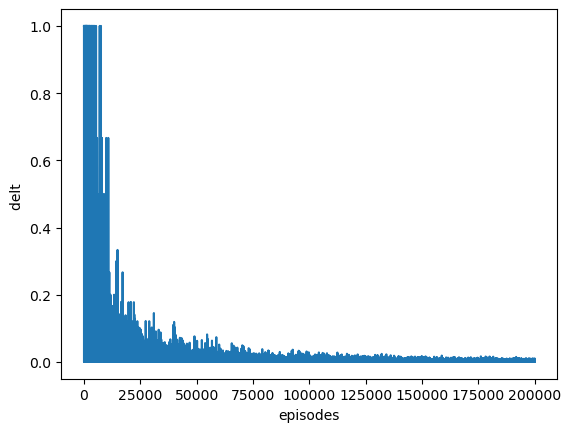

In [21]:
plt.plot(DELTA)
plt.xlabel("episodes")
plt.ylabel("delt ")
plt.show()

As you can see the delta parameter is generally decreasing, which makes sense since our model comes closer and closer to the optimal values for the value function. Speaking of which, let's see the map of expected returns based on what player has and what the dealer has. 


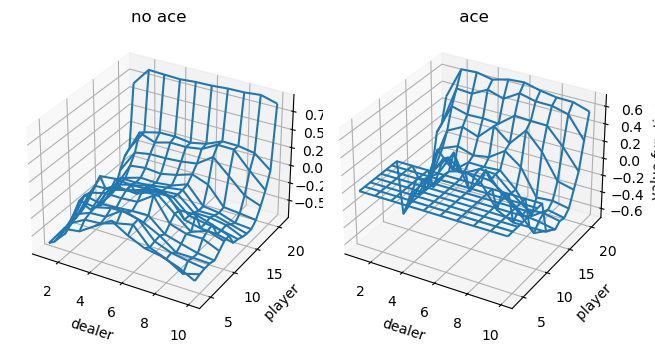

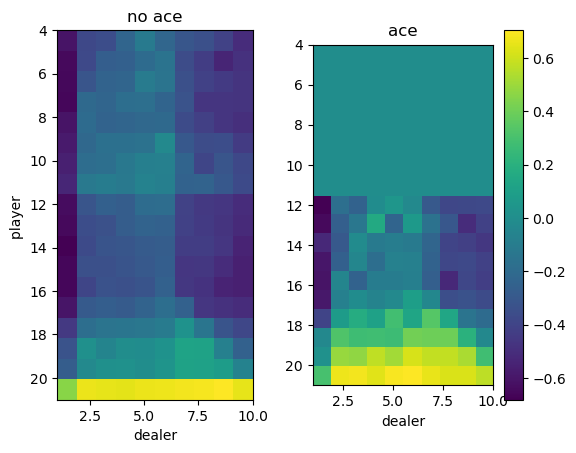

In [22]:
plot_value_function(V)

We see a general trend, as the score of the player increases the value function takes on higher values so our expected return grows. Let see the average result of playing ten thousand games. Let's compare the result, first  using the random policy.


In [23]:
average, std_win = average_wins(environment, episodes=200000)
print("Average number of wins", average)

Average number of wins 0.28201


So the random policy gives us around $28\%$ of wins, now let's see what the trained policy returns:


In [24]:
average, std_win = average_wins(environment, policy, episodes=200000)
print("Average wins:", average, std_win)

Average wins: 0.43381 0.001108194215604828


Oh wow, more than 10% increase, that's not bad at all, lets see what happens when we use more episodes to train our model. 


In [25]:
policy, V, Q, DELTA = monte_carlo_ES(environment, N_episodes = 500000, discount_factor = 1, first_visit = True, theta = 0)  

Let's see what's happening with the learning rate:


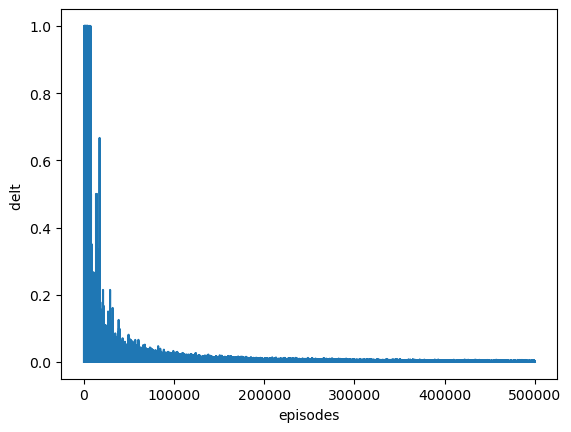

In [26]:
plt.plot(DELTA)
plt.xlabel("episodes")
plt.ylabel("delt ")
plt.show()

Falling as expected, now let's check what our policy returns:


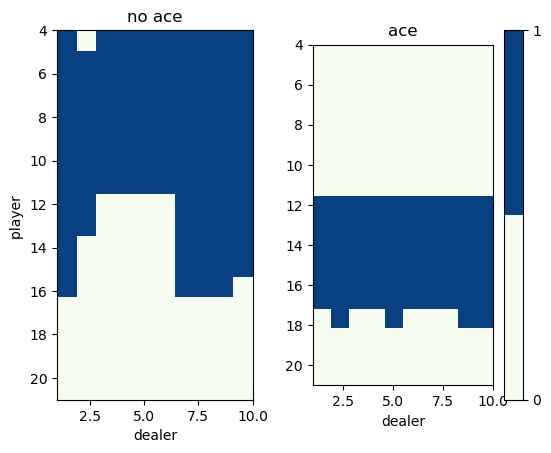

In [27]:
plot_policy_blackjack(policy)

It looks like the optimal policy for blackjack is: If the agent has no ace, the higher the dealer is showing, the more likely the agent is to hit, the exception is if the dealer has an ace. If the agent has an ace, the strategy is different. The agent will stick if the sum of their cards is over 11 and, for the most part, hold the player's sum is over 18. Let's plot the value function to explore the expected returns after 50 000 episodes:


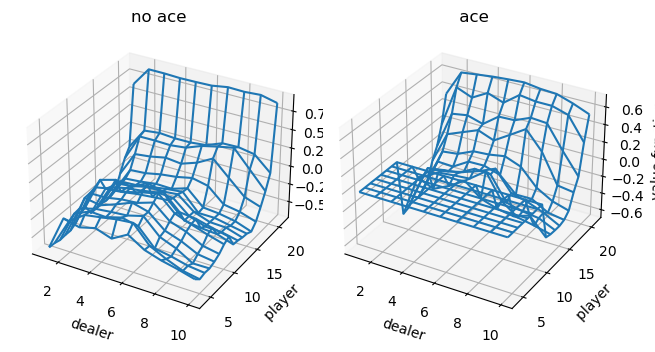

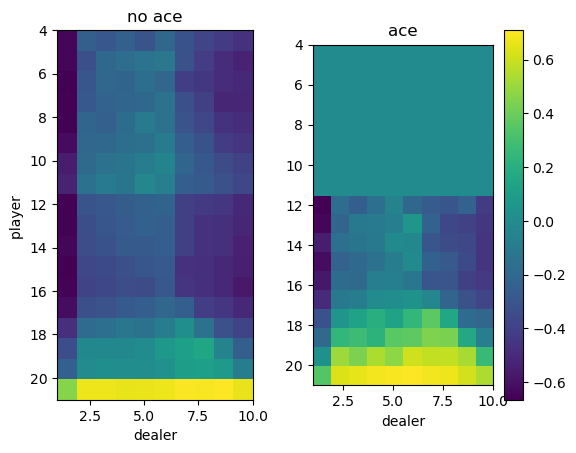

In [28]:
plot_value_function(V)

And, most importantly, lets compare the accuracy of the results:


In [29]:
average, std_win = average_wins(environment, policy, episodes = 500000)
print("Average wins:", average, std_win)

Average wins: 0.43389 0.0007008986630034331


We see as the accuracy is now approximately 43% a 15 % improvement from a random policy:


In [30]:
accuracy = [] 
episodes = []

for n_episode in [1, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]:
    print("n_episode: ", str(n_episode))
    policy, V, Q, DELTA = monte_carlo_ES(environment, N_episodes = n_episode, discount_factor = 1, first_visit = True, theta = 0)  
    average ,std_win = average_wins(environment,policy,episodes = 5000000)
    print("n_episode: ", str(n_episode), " average: ", str(average))
    accuracy.append(average)
    episodes.append(n_episode)

n_episode:  1
n_episode:  1  average:  0.2823204
n_episode:  500
n_episode:  500  average:  0.353375
n_episode:  1000
n_episode:  1000  average:  0.4053074
n_episode:  5000
n_episode:  5000  average:  0.4140094
n_episode:  10000
n_episode:  10000  average:  0.4262792
n_episode:  50000
n_episode:  50000  average:  0.4280126
n_episode:  100000
n_episode:  100000  average:  0.4315838
n_episode:  500000
n_episode:  500000  average:  0.43157
n_episode:  1000000
n_episode:  1000000  average:  0.4339378


We see that after 50000 episodes the improvement is negligible.


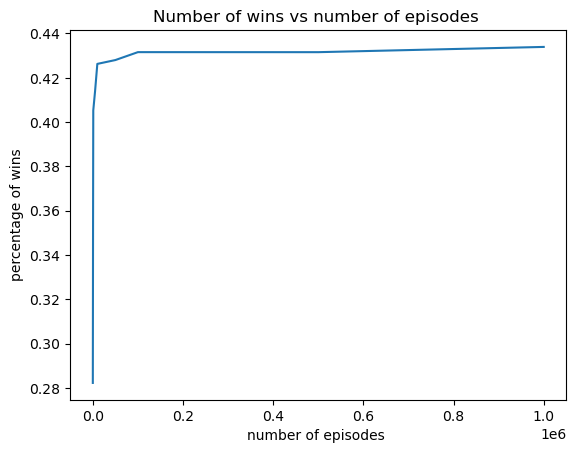

In [31]:
plt.plot(episodes,accuracy)
plt.title("Number of wins vs number of episodes ")
plt.ylabel('percentage of wins')
plt.xlabel('number of episodes ')
plt.show()

Let's experiment with the discount factor, to see if it changes anything: 


In [34]:
accuracy=[] 
discounts=[]

for discount in [0, 0.01, 0.1, 0.5, 1.0]:
    policy, V, Q, delta = monte_carlo_ES( environment, N_episodes = 1000000, discount_factor = discount, first_visit = True, theta = 0)  
    average ,std_win=average_wins(environment, policy, episodes = 1000000)
    print("discount: {}, average wins: {}".format(discount, average))
    discounts.append(discount)
    accuracy.append(average)

discount:  0  average:  0.280013
discount:  0.01  average:  0.362598
discount:  0.1  average:  0.378181
discount:  0.5  average:  0.426133
discount:  1.0  average:  0.433085


We see as the Discount factor increases, the percentage of wins increases as well, the rate of increase begins to slow down when the discount value is 0.6.


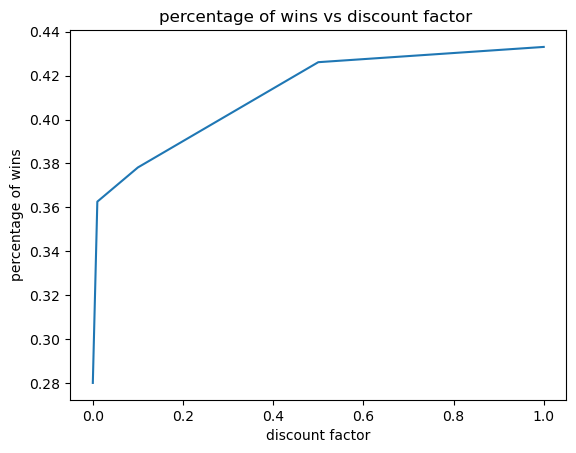

In [35]:
plt.plot(discounts,accuracy)
plt.title("percentage of wins vs discount factor ")
plt.ylabel('percentage of wins')
plt.xlabel('discount factor')
plt.show()

In Conclusion, we have created a successful algorithm, that was able to give us perhaps not a winning, but an optimal strategy for blackjack. 


In [49]:
games_with_policy(environment = environment, policy = policy, episodes = 10)

_________________________________________
Episode 0
State: (17, 1, False)
The Agent's current sum: 17, The Dealer's one showing card: 1, Agent's usable ace: False
The Agent has the following cards: [10, 7]
The Dealer has the following cards: [1, 8]
Stand
State: (17, 1, False)
The Agent's current sum: 17, The Dealer's one showing card: 1, Agent's usable ace: False
The Agent has the following cards: [10, 7]
The Dealer has the following cards: [1, 8]
Done: True
Final state: (17, 1, False)
The Agent's final sum: 17, The Dealer's one showing card: 1, Agent's usable ace: False
The Agent's final cards: [10, 7]
The Dealer cards: [1, 8] The Dealer's score: 19 The Agent's score: 17 
Agent Loses
_________________________________________
Episode 1
State: (15, 8, True)
The Agent's current sum: 15, The Dealer's one showing card: 8, Agent's usable ace: True
The Agent has the following cards: [4, 1]
The Dealer has the following cards: [8, 10]
Hit
State: (15, 8, False)
The Agent's current sum: 15, The 

# Q-Learning

In [ ]:
unique_states = []
for player_hand in range(1,33):
    for dealer_hand in range(1,12):
        for ace_present in range(0,2):
            identifier = str(player_hand) + '_' + str(dealer_hand) + '_' + str(ace_present)
            unique_states.append(identifier)

q_table = {}
for unique_state in unique_states:
    q_table[unique_state] = {}
    for hit_or_stay in range(0,2):
        q_table[unique_state][hit_or_stay] = 0

In [16]:
print('Total number of possible states of the environment: {}'.format(len(q_table)))

Total number of possible states of the environment: 704


In [27]:
def QLearning(env, episodes = 1000000, alpha = 0.1, gamma = 0.6, epsilon = 0.1):

    unique_states = []
    for player_hand in range(1,33):
        for dealer_hand in range(1,12):
            for ace_present in range(0,2):
                identifier = str(player_hand) + '_' + str(dealer_hand) + '_' + str(ace_present)
                unique_states.append(identifier)

    q_table = {}
    for unique_state in unique_states:
        q_table[unique_state] = {}
        for hit_or_stay in range(0,2):
            q_table[unique_state][hit_or_stay] = 0

    #number  of actions 
    number_actions = env.action_space.n

    for i in range(1, episodes + 1):

        # Initialize environment, assign state code
        done = False
        state = env.reset()
        if state[2] == False:
            is_ace = 0
        else :
            is_ace = 1
        state_code = str(state[0]) + '_' + str(state[1]) + '_' + str(is_ace)

        # While game still active, select action and get next state, reward, new environment
        while not done:
                
            to_consider = [q_table[state_code][0], q_table[state_code][1]]
            action = np.argmax(to_consider) # Exploit learned values
            random_action(action, epsilon, number_actions)

            next_state, reward, done, info = env.step(action)

            if next_state[0] < 21:
                if next_state[2] == False:
                    next_is_ace = 0
                else :
                    next_is_ace = 1
                next_state_code = str(next_state[0]) + '_' + str(next_state[1]) + '_' + str(next_is_ace)

                old_value = q_table[state_code][action]

                next_to_consider = [q_table[next_state_code][0], q_table[next_state_code][1]]
                next_max = np.max(next_to_consider)

                new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
                q_table[state_code][action] = new_value

            else:

                new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
                q_table[state_code][action] = new_value

    print("Training finished.\n")

    return q_table

In [28]:
q_table = QLearning(env = environment, episodes = 2000000)

Training finished.



In [29]:
q_table

{'1_1_0': {0: 0, 1: 0},
 '1_1_1': {0: 0, 1: 0},
 '1_2_0': {0: 0, 1: 0},
 '1_2_1': {0: 0, 1: 0},
 '1_3_0': {0: 0, 1: 0},
 '1_3_1': {0: 0, 1: 0},
 '1_4_0': {0: 0, 1: 0},
 '1_4_1': {0: 0, 1: 0},
 '1_5_0': {0: 0, 1: 0},
 '1_5_1': {0: 0, 1: 0},
 '1_6_0': {0: 0, 1: 0},
 '1_6_1': {0: 0, 1: 0},
 '1_7_0': {0: 0, 1: 0},
 '1_7_1': {0: 0, 1: 0},
 '1_8_0': {0: 0, 1: 0},
 '1_8_1': {0: 0, 1: 0},
 '1_9_0': {0: 0, 1: 0},
 '1_9_1': {0: 0, 1: 0},
 '1_10_0': {0: 0, 1: 0},
 '1_10_1': {0: 0, 1: 0},
 '1_11_0': {0: 0, 1: 0},
 '1_11_1': {0: 0, 1: 0},
 '2_1_0': {0: 0, 1: 0},
 '2_1_1': {0: 0, 1: 0},
 '2_2_0': {0: 0, 1: 0},
 '2_2_1': {0: 0, 1: 0},
 '2_3_0': {0: 0, 1: 0},
 '2_3_1': {0: 0, 1: 0},
 '2_4_0': {0: 0, 1: 0},
 '2_4_1': {0: 0, 1: 0},
 '2_5_0': {0: 0, 1: 0},
 '2_5_1': {0: 0, 1: 0},
 '2_6_0': {0: 0, 1: 0},
 '2_6_1': {0: 0, 1: 0},
 '2_7_0': {0: 0, 1: 0},
 '2_7_1': {0: 0, 1: 0},
 '2_8_0': {0: 0, 1: 0},
 '2_8_1': {0: 0, 1: 0},
 '2_9_0': {0: 0, 1: 0},
 '2_9_1': {0: 0, 1: 0},
 '2_10_0': {0: 0, 1: 0},
 '2_10_1': 

# Exercises

<p style='color:blue'>Here are some exercises for you to practice what you have learned.</p>

As you have noticed, there is a good amount of parameters that can be modified when training our model. Use `monte_carlo_ES` function using every-visit, use 50000 episodes and discount factor of 1


In [ ]:
#TODO: implement the code with defined parameters

<details>
    <summary>Click here for Solution</summary>

```python
policy, V, Q, delta = monte_carlo_ES( environment,N_episodes=50000, discount_factor=1,first_visit=False, theta=0)
average ,std_win=average_wins(environment,policy,episodes=10000)
```

</details>


Determine the number of wins  after 1000 episodes. 


In [ ]:
#TODO: implement the code to calculate the winnning rate

<details>
    <summary>Click here for Solution</summary>

```python
average ,std_win=average_wins(environment,policy,episodes=10000)
```

</details>


# Congratulations! - You have completed the lab


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

[Artem Arutyunov](https://www.linkedin.com/in/artem-arutyunov/)


## Citations:

* [OpenAi BlackJack](https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py)

* [Algorithms and pseudocode: Sutton, Richard S., and Andrew G. Barto. "Reinforcement learning: An introduction](https://www.amazon.ca/Reinforcement-Learning-Introduction-Second-Paperback/dp/B0B95WFGV6/ref=asc_df_B0B95WFGV6/?tag=googleshopc0c-20&linkCode=df0&hvadid=578919340205&hvpos=&hvnetw=g&hvrand=11011609051689383259&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9000828&hvtargid=pla-1728961664549&psc=1)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2022-11-17|0.1|Artem Arutyuno|Create Lab|


Copyright © 2022 IBM Corporation. All rights reserved.


IBM has a special offer for watsonx.ai a studio for new foundation models, generative AI and machine learning. To take advantage of this offer visit [watsonx.ai](https://dataplatform.cloud.ibm.com/registration/stepone?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsINDGPXX0EP1EN1318-2023-01-01&context=wx&apps=data_science_experience%2Cwatson_data_platform%2Ccos)
